In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import time
import warnings
import json

warnings.filterwarnings('ignore')

## Carrega e analisa a  base de dados

In [4]:
df_train = pd.read_csv("../data/imageTrainDataSet.csv")
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,2.802592,0.000000,2.419251,0.000000,25.850954,8.406624,3.889212,1.309759,14.579442,60.298489,...,155.205734,62.641945,0.000000,0.0,1.351078,0.0,0.000000,0.000000,18.597864,1
1,0.000000,0.000000,3.421265,0.000000,7.411167,0.000000,0.000000,0.000000,10.072591,41.298714,...,138.896164,40.952168,0.000000,0.0,0.000000,0.0,0.000000,0.000000,20.201843,1
2,8.689170,0.000000,16.372234,0.000000,2.158112,24.020809,51.093063,0.000000,62.438568,78.934143,...,0.000000,40.056435,0.000000,0.0,0.000000,0.0,6.272342,26.144714,9.841871,1
3,17.297232,0.000000,15.390459,0.000000,10.339233,0.000000,0.000000,0.000000,0.000000,78.790497,...,157.481506,60.294369,0.000000,0.0,0.000000,0.0,1.329466,3.993140,38.569000,1
4,52.470585,83.641388,79.671761,9.335004,32.030472,0.000000,0.000000,49.733284,0.000000,41.290382,...,64.682297,109.422462,19.874949,0.0,0.000000,0.0,15.806639,29.668850,38.129742,1


In [6]:
df_test = pd.read_csv("../data/imageTestDataSet.csv")
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,Target
0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,54.366787,0.0,0.0,...,97.608917,14.459713,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
1,38.258987,0.0,19.445879,0.0,0.0,0.0,0.0,7.791460,0.0,0.0,...,59.617912,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
2,41.004650,0.0,22.499952,0.0,0.0,0.0,0.0,1.438439,0.0,0.0,...,66.809647,12.714787,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
3,59.235928,0.0,0.000000,0.0,0.0,0.0,0.0,12.839417,0.0,0.0,...,37.821468,12.451595,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,96.897903,6.766070,0.0,0.0,0.098201,0.0,0.0,0.0,0.0,1


## Divide a base em Treino e Test

In [7]:
X_train=df_train.drop("Target",axis=1)
y_train=df_train["Target"]

X_test=df_test.drop("Target",axis=1)
y_test=df_test["Target"]

In [8]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,...,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,3.887230,3.247444,4.200222,5.324560,3.989476,4.340333,3.447893,10.084506,5.373670,4.897820,...,16.387003,23.449745,12.409305,7.165364,7.072646,7.694301,8.809542,7.718414,11.913271,11.655399
std,11.550812,12.227142,12.514285,17.091833,12.534773,12.204286,12.421243,19.859523,17.489644,15.260643,...,41.987429,40.539643,21.509683,16.409593,21.167116,18.220843,24.263310,23.069898,21.349509,21.704520
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.282357,0.000000,0.000000,...,5.060711,32.965056,17.737343,4.382578,0.000000,4.559304,0.000000,0.000000,16.960001,15.673463
max,116.249710,135.118362,106.883446,149.036377,110.275520,98.195953,181.465195,137.014618,178.688629,147.352890,...,365.912354,306.928009,162.855591,127.336914,229.924103,143.816956,217.305252,225.921432,187.903152,189.659103


## Pipe

In [9]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('LR', LogisticRegression(random_state=42))])


# source: https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976

## Utiliza GridSearchCV para encontrar os melhores parametros

In [10]:
hyperparameters = {'LR__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                   'LR__solver': ['newton-cg','lbfgs','liblinear','sag','saga'],
                   'LR__multi_class': ['auto','ovr','multinomial'],
                   'LR__dual': [True, False],
                   'LR__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                   'LR__max_iter': np.arange(100, 500, 20).tolist()}

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

gscv  = GridSearchCV(pipeline, 
                     param_grid=hyperparameters, 
                     cv=kfold, 
                     scoring='accuracy',
                     n_jobs=-1)

In [11]:
star = time.time()
gscv_result = gscv.fit(X_train, y_train)
end = time.time()

print("GridSearchCV took: {} minutes".format((end-star)/60))
print("GridSearchCV Best: ", gscv_result.best_score_)
print("Parameters:\n", json.dumps(gscv_result.best_params_, indent=2))

GridSearchCV took: 101.33643918037414 minutes
GridSearchCV Best:  0.8838331160365058
Parameters:
 {
  "LR__C": 10,
  "LR__dual": true,
  "LR__max_iter": 240,
  "LR__multi_class": "auto",
  "LR__penalty": "l2",
  "LR__solver": "liblinear"
}


## Normaliza a base 

In [16]:
scaler_train = StandardScaler()
X_train = scaler_train.fit_transform(X_train)

scaler_test = StandardScaler()
X_test = scaler_test.fit_transform(X_test)

## Treina o modelo com o melhores parâmetros encontrados

In [17]:
model = LogisticRegression(penalty="l2", dual=True, max_iter=240, multi_class="auto", solver="liblinear", C=10)
model.fit(X_train,y_train)

LogisticRegression(C=10, class_weight=None, dual=True, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=240,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
model.score(X_train, y_train)

0.886310299869622

In [19]:
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 ... 0 0 0]


## Matriz Confusão

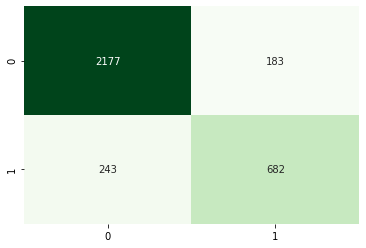

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

cfm = confusion_matrix(y_test, y_pred)

sns.heatmap(cfm, cbar=False, annot=True, cmap="Greens", fmt="d")

## Métricas de análise

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score, accuracy_score

mae    = mean_absolute_error(y_test, y_pred)
mse    = mean_squared_error(y_test, y_pred)
rmse   = np.sqrt(mean_squared_error(y_test, y_pred))
r_sqrd = r2_score(y_test, y_pred)

print(f"Mean Absolute Error   : {mae:.2f}")
print(f"Mean Squared Error    : {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R-Squared             : {r_sqrd:.2f}")

Mean Absolute Error   : 0.13
Mean Squared Error    : 0.13
Root Mean Square Error: 0.36
R-Squared             : 0.36
